In [93]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import operator as op
from functools import reduce

In [115]:
def ProbOverallFailure(probSingleFailure,N):
    #using the repetition code and mayority voting for error correcting
    #with N repetitions devoted to a single logical bit transmission
    #with each one of the single iterations having a probability of failure
    
    #returns the overall probability of failure
    
    sum = 0
    for i in range(int(N/2)+1,N+1):
        sum += ncr(N,i)*m.pow(probSingleFailure,i)*m.pow(1-probSingleFailure,N-i)
    
    return sum

def ncr(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom  # or / in Python 2

def NrepRequired(probSingleFailure,maxProbOverallFailure):
    #fixing the funciton attributes
    #returns the number of repetition bits required for:
    #probOverallFailure(probSingleFailure,NRepRequired) <= maxProbOverallFailure
    repBits = 1
    while(True):
        if maxProbOverallFailure >= ProbOverallFailure(probSingleFailure,repBits):
            break
        else:
            repBits += 2
    return repBits
 
def bisection(f, a, b, tol=1e-6):
    """
    Find the root of a given function f(x) using the bisection method.
    :param f: The function to find the root of.
    :param a: The left endpoint of the initial interval.
    :param b: The right endpoint of the initial interval.
    :param tol: The tolerance for the root.
    :return: The root of the function.
    """
    # check if the function changes sign between a and b
    if f(a)*f(b) > 0:
        raise ValueError("The function does not change sign between a and b")
    # loop until the interval is less than the tolerance
    while abs(b-a) > tol:
        # find the middle point of the interval
        xo = (a+b)/2
        # check if the function is zero at the middle point
        if f(xo) == 0:
            return xo
        # check if the function changes sign between a and xo
        if f(a)*f(xo) < 0:
            b = xo
        else:
            a = xo
    return (a+b)/2

def rateDifference_fixedFidelity(prop_eve):
    #Returns the decay rate difference of the probability of overall failure for Eve and Alice/Bob
    #Input: proportion of qubits that Eve has access to

    n = 40
    #Fidelity_AB = 0.95
    prop_fidelity_Eve = 1


    N_repbits_max = 2*n +1
    N_repbits_array = np.linspace(1,N_repbits_max,n+1,dtype=int)
    N_probs = 2
    Fidelity_Eve = prop_fidelity_Eve*Fidelity_AB
    single_prob_array = [1-Fidelity_AB*(1-1/4*prop_eve),1-Fidelity_Eve]
    overall_prob_array = np.zeros([N_probs,n+1])

    for j in range(n+1):
        if int(prop_eve*N_repbits_array[j])%2 == 1:
            N_rep_eve = int((prop_eve*N_repbits_array[j]+1)/2)
        elif int(prop_eve*N_repbits_array[j]) == 0:
            N_rep_eve = 1
        else:
            N_rep_eve = int(prop_eve*N_repbits_array[j]/2)

        overall_prob_array[0,j] = ProbOverallFailure(single_prob_array[0],N_repbits_array[j])
        overall_prob_array[1,j] = ProbOverallFailure(single_prob_array[1],N_rep_eve)


    fit_AB_array = np.polyfit(N_repbits_array[:], np.log(overall_prob_array[0,:]), 1)
    fit_Eve_array= np.polyfit(N_repbits_array[:], np.log(overall_prob_array[1,:]), 1)
    
    return fit_AB_array[0]-fit_Eve_array[0]

def rateDifference_fixedProp(prop_fidelity_Eve):
    #Returns the decay rate difference of the probability of overall failure for Eve and Alice/Bob
    #Input: proportion of qubits that Eve has access to

    n = 40
    #Fidelity_AB = 0.95
    prop_eve = 1


    N_repbits_max = 2*n +1
    N_repbits_array = np.linspace(1,N_repbits_max,n+1,dtype=int)
    N_probs = 2
    Fidelity_Eve = prop_fidelity_Eve*Fidelity_AB
    single_prob_array = [1-Fidelity_AB*(1-1/4*prop_eve),1-Fidelity_Eve]
    overall_prob_array = np.zeros([N_probs,n+1])

    for j in range(n+1):
        if int(prop_eve*N_repbits_array[j])%2 == 1:
            N_rep_eve = int((prop_eve*N_repbits_array[j]+1)/2)
        elif int(prop_eve*N_repbits_array[j]) == 0:
            N_rep_eve = 1
        else:
            N_rep_eve = int(prop_eve*N_repbits_array[j]/2)

        overall_prob_array[0,j] = ProbOverallFailure(single_prob_array[0],N_repbits_array[j])
        overall_prob_array[1,j] = ProbOverallFailure(single_prob_array[1],N_rep_eve)


    fit_AB_array = np.polyfit(N_repbits_array[:], np.log(overall_prob_array[0,:]), 1)
    fit_Eve_array= np.polyfit(N_repbits_array[:], np.log(overall_prob_array[1,:]), 1)
    
    return fit_AB_array[0]-fit_Eve_array[0]


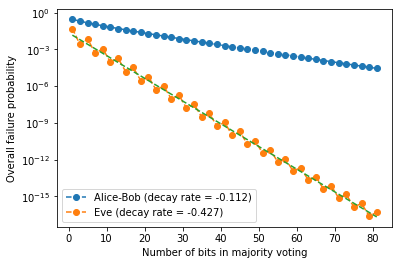

In [116]:
#Fixing ProbSingleFailure, plotting ProbOverallFailure(N repbits)

n = 40
Fidelity_AB = 0.95
prop_fidelity_Eve = 1
prop_eve = 1


N_repbits_max = 2*n +1
N_repbits_array = np.linspace(1,N_repbits_max,n+1,dtype=int)
N_probs = 2
Fidelity_Eve = prop_fidelity_Eve*Fidelity_AB
single_prob_array = [1-Fidelity_AB*(1-1/4*prop_eve),1-Fidelity_Eve]
overall_prob_array = np.zeros([N_probs,n+1])

for j in range(n+1):
    if int(prop_eve*N_repbits_array[j])%2 == 1:
        N_rep_eve = int((prop_eve*N_repbits_array[j]+1)/2)
    elif int(prop_eve*N_repbits_array[j]) == 0:
        N_rep_eve = 1
    else:
        N_rep_eve = int(prop_eve*N_repbits_array[j]/2)
    
    overall_prob_array[0,j] = ProbOverallFailure(single_prob_array[0],N_repbits_array[j])
    overall_prob_array[1,j] = ProbOverallFailure(single_prob_array[1],N_rep_eve)


fit_AB_array = np.polyfit(N_repbits_array[:], np.log(overall_prob_array[0,:]), 1)
fit_Eve_array= np.polyfit(N_repbits_array[:], np.log(overall_prob_array[1,:]), 1)

plt.plot(N_repbits_array,overall_prob_array[0,:],"o--",label= "Alice-Bob (decay rate = " + str("%.3f" %fit_AB_array[0])+")")
plt.plot(N_repbits_array,overall_prob_array[1,:],"o--",label= "Eve (decay rate = " + str("%.3f" %fit_Eve_array[0])+")")
plt.plot(N_repbits_array,np.exp(fit_Eve_array[1]+fit_Eve_array[0]*N_repbits_array[:]),"--")
plt.yscale("log")

plt.xlabel("Number of bits in majority voting")
plt.ylabel("Overall failure probability")
plt.legend()             
plt.show()


In [118]:
print(rateDifference_fixedFidelity(0),"",rateDifference_fixedFidelity(1))

-0.8462075836726357  0.31485156325913116


In [114]:
#Fixing Fidelity Alice Bob = Fidelity Eve = 95%
#What's the maximum proportion of bits Eve can have access to?
Fidelity_AB = 0.95

prop_good = 0
prop_bad = 1

prop_crit = bisection(rateDifference_fixedFidelity, prop_good, prop_bad, tol=1e-8)
print("Critical proportion: ",prop_crit)


Critical proportion:  0.5890410952270031


In [121]:
#Eve has access to all qubits
#What's the maximum fidelity proportion Eve can have (with respect to Alice and Bob's)
Fidelity_AB = 0.95

prop_fid_good = 0.75
prop_fid_bad = 1

prop_fid_crit = bisection(rateDifference_fixedProp, prop_fid_good, prop_fid_bad, tol=1e-8)
print("Critical proportion: ",prop_fid_crit)


Critical proportion:  0.8313864804804325
